Import needed libaries

In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.applications import ResNet50, VGG16,InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2. Set up your environment: Ensure that you have installed all the required software
packages.

Download the dataset

In [3]:
(x_temp, y_temp), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


3. Prepare your dataset: Download the CIFAR-10 dataset. This dataset contains 60,000
color images in 10 different classes. Documentation of this data set can be found
in CIFAR-10 dataset. You may use listing 1 to load data. Further, apply suitable
feature scaling. Refer this for more information "pytorch normalization".

Normalization the data

In [4]:
x_temp = x_temp.astype('float32') / 255
x_test = x_test.astype('float32') / 255

4. Split the dataset into training, validation, and testing subsets using a ratio of 60%
for training and 20% each for validation and testing sets

split the dataset

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42,shuffle=True)

Find the shape of dataset

In [6]:
x_train.shape

(40000, 32, 32, 3)

one hot encoding the dataset

In [7]:
# Number of classes (in CIFAR-10, there are 10 classes)
num_classes = 10
# One-hot encode the training labels
y_train = to_categorical(y_train, num_classes)
# One-hot encode the testing labels
y_val = to_categorical(y_val, num_classes)

5. Build the CNN mode

6. Determine the parameters of the above network 

Define the model

In [8]:
# Define the model
def createmodel():
    model = Sequential()
    # Convolutional Layer 1
    #filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3),padding="Same", activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Convolutional Layer 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3),padding="Same", activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten the output
    model.add(Flatten())
    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    return model

Get the model summary

Model loss function

In [9]:
# Compile the model
def compilemodel(model,ln_rate):
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=ln_rate),
                  metrics=['accuracy'])
    return model


7. Train the model:

Fit the model

In [10]:
# Train the model for 20 epochs and store the training history
def fitmodel(model,epochs,batch_size):
    history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val))
    return model,history

In [11]:
model=createmodel()
model=compilemodel(model,0.001)
model,history=fitmodel(model,30,200)

Epoch 1/30
200/200 [==============================] - 8s 9ms/step - loss: 1.7518 - accuracy: 0.3647 - val_loss: 1.3923 - val_accuracy: 0.5128
Epoch 2/30
200/200 [==============================] - 1s 6ms/step - loss: 1.4152 - accuracy: 0.4941 - val_loss: 1.2311 - val_accuracy: 0.5615
Epoch 3/30
200/200 [==============================] - 1s 6ms/step - loss: 1.2786 - accuracy: 0.5436 - val_loss: 1.1807 - val_accuracy: 0.5895
Epoch 4/30
200/200 [==============================] - 1s 6ms/step - loss: 1.1880 - accuracy: 0.5829 - val_loss: 1.0779 - val_accuracy: 0.6193
Epoch 5/30
200/200 [==============================] - 1s 6ms/step - loss: 1.1241 - accuracy: 0.6021 - val_loss: 1.0387 - val_accuracy: 0.6297
Epoch 6/30
200/200 [==============================] - 1s 6ms/step - loss: 1.0739 - accuracy: 0.6230 - val_loss: 1.0177 - val_accuracy: 0.6463
Epoch 7/30
200/200 [==============================] - 1s 6ms/step - loss: 1.0316 - accuracy: 0.6386 - val_loss: 0.9719 - val_accuracy: 0.6588
Epoch 

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Test accuracy

In [15]:
y_test_one_hot= to_categorical(y_test, num_classes)
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.0630 - accuracy: 0.6818
Test Accuracy: 68.18%


Confusion matrix for train dataset

In [22]:
# Make predictions on the test data
y_pred = model.predict(x_train)

# Convert one-hot encoded predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_train_val= np.argmax(y_train, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_train_val, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and print classification report with precision and recall
classification_rep = classification_report(y_train_val, y_pred_classes)
print("Classification Report:")
print(classification_rep)

1250/1250 [==============================] - 2s 2ms/step
Confusion Matrix:
[[3830   12   60    9   12    9    6   12   51   26]
 [  26 3930    4    6    3    1    9    1    9   32]
 [ 138    5 3407   83  110   72  121   15   17    2]
 [  18    3  107 3358   62  255  131   23   15    5]
 [  69    3  148   81 3522   47  133   50   12    2]
 [   7    3   81  331   78 3383   46   49    3    4]
 [   6    2   55   50   23   17 3846    2    3    0]
 [   6    2   41   67   82   62    4 3729    3   10]
 [ 104   24   18   11    3    1    6    0 3807    9]
 [  41   96    7   14    0    4    3    8   30 3757]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4027
           1       0.96      0.98      0.97      4021
           2       0.87      0.86      0.86      3970
           3       0.84      0.84      0.84      3977
           4       0.90      0.87      0.88      4067
           5       0.88      0.85      0.86   

Confusion matix for test dataset

In [19]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and print classification report with precision and recall
classification_rep = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(classification_rep)




313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[771  29  35  19  15   7  15  12  60  37]
 [ 29 810   7  16   2   5   6   5  36  84]
 [ 78  11 545  57  88  80  86  34  12   9]
 [ 25  21  68 507  51 172  95  31  18  12]
 [ 40   4  93  83 578  36  93  56  14   3]
 [ 15   7  61 186  42 580  45  52   8   4]
 [  8   9  47  75  24  25 801   4   5   2]
 [ 22   5  37  48  64  68   7 727   6  16]
 [ 90  47  16  15   5   8  15   4 771  29]
 [ 49 125  12  19   5   8   6  17  31 728]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.76      0.81      0.78      1000
           2       0.59      0.55      0.57      1000
           3       0.49      0.51      0.50      1000
           4       0.66      0.58      0.62      1000
           5       0.59      0.58      0.58      1000
           6       0.69      0.80      0.74      1000
           7       0.77      0.73      0

In [23]:

learning_rates = [0.0001, 0.001, 0.01, 0.1]
history_per_lr = []
normal_models=[]

for lr in learning_rates:
    model=createmodel()
    model=compilemodel(model, lr)
    model,history=fitmodel(model,30,200)
    history_per_lr.append(history)
    normal_models.append(model)

    


Epoch 1/30
200/200 [==============================] - 2s 8ms/step - loss: 2.0818 - accuracy: 0.2521 - val_loss: 1.8290 - val_accuracy: 0.3770
Epoch 2/30
200/200 [==============================] - 1s 6ms/step - loss: 1.8103 - accuracy: 0.3541 - val_loss: 1.6664 - val_accuracy: 0.4210
Epoch 3/30
200/200 [==============================] - 1s 6ms/step - loss: 1.6970 - accuracy: 0.3952 - val_loss: 1.5704 - val_accuracy: 0.4536
Epoch 4/30
200/200 [==============================] - 1s 6ms/step - loss: 1.6226 - accuracy: 0.4210 - val_loss: 1.5006 - val_accuracy: 0.4740
Epoch 5/30
200/200 [==============================] - 1s 6ms/step - loss: 1.5517 - accuracy: 0.4413 - val_loss: 1.4446 - val_accuracy: 0.4988
Epoch 6/30
200/200 [==============================] - 1s 6ms/step - loss: 1.5006 - accuracy: 0.4646 - val_loss: 1.3958 - val_accuracy: 0.5110
Epoch 7/30
200/200 [==============================] - 1s 6ms/step - loss: 1.4584 - accuracy: 0.4804 - val_loss: 1.3489 - val_accuracy: 0.5311
Epoch 

Plot the graphs

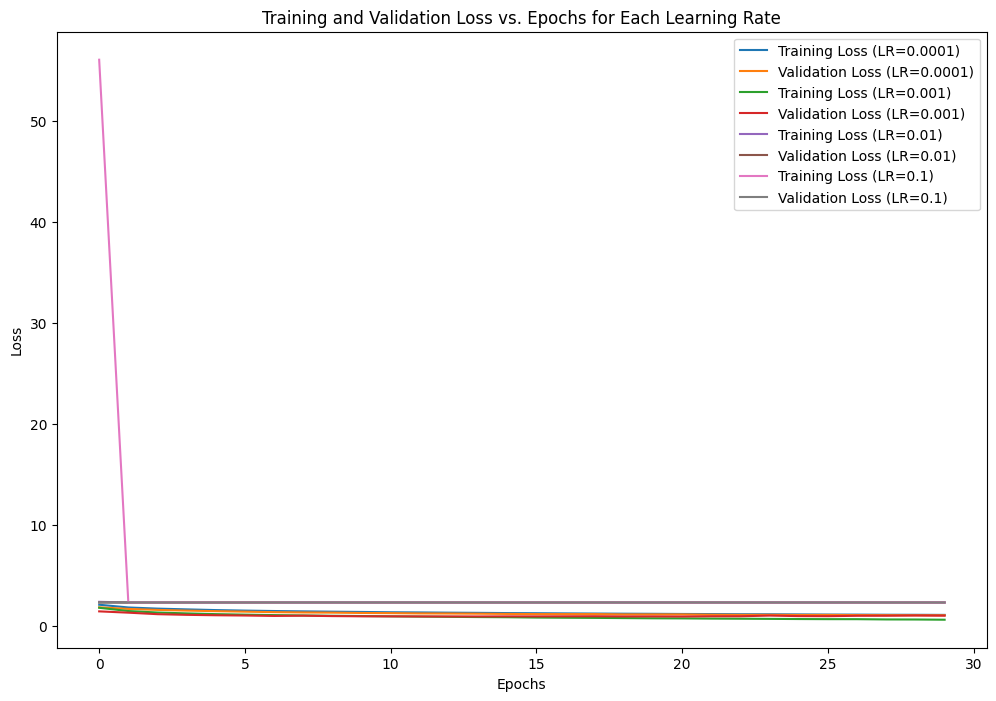

In [24]:
# Plot training and validation loss for each learning rate
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(history_per_lr[i].history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history_per_lr[i].history['val_loss'], label=f'Validation Loss (LR={lr})')
    
plt.title('Training and Validation Loss vs. Epochs for Each Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

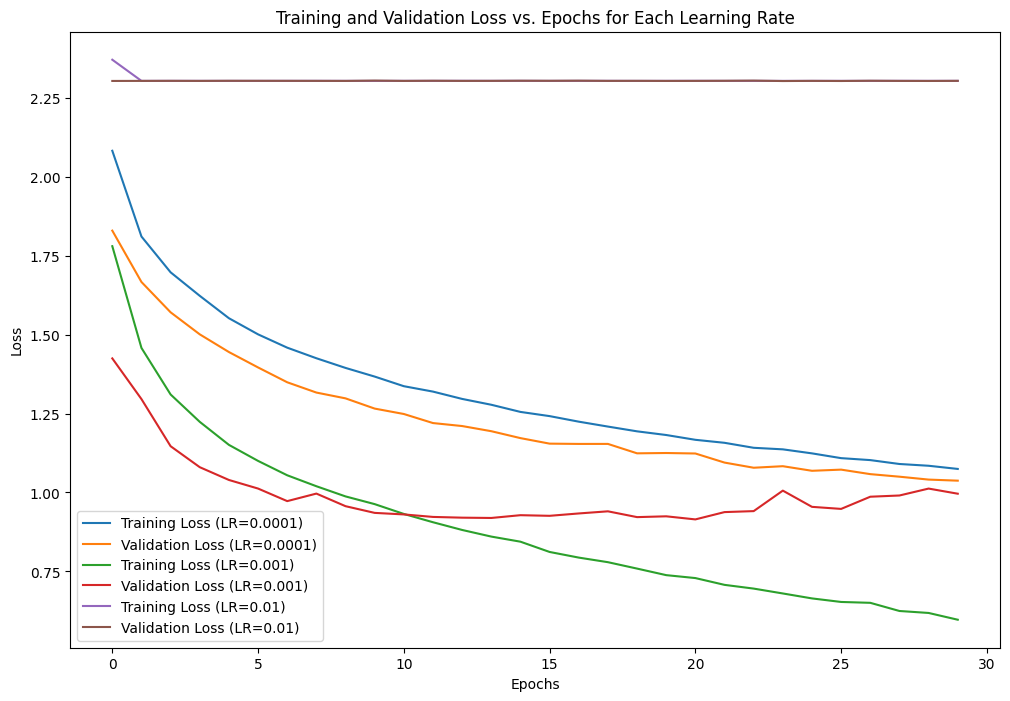

In [25]:
learning_rates_new=[0.0001,0.001,0.01]
# Plot training and validation loss for each learning rate
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates_new):
    plt.plot(history_per_lr[i].history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history_per_lr[i].history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.title('Training and Validation Loss vs. Epochs for Each Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plot accuracy

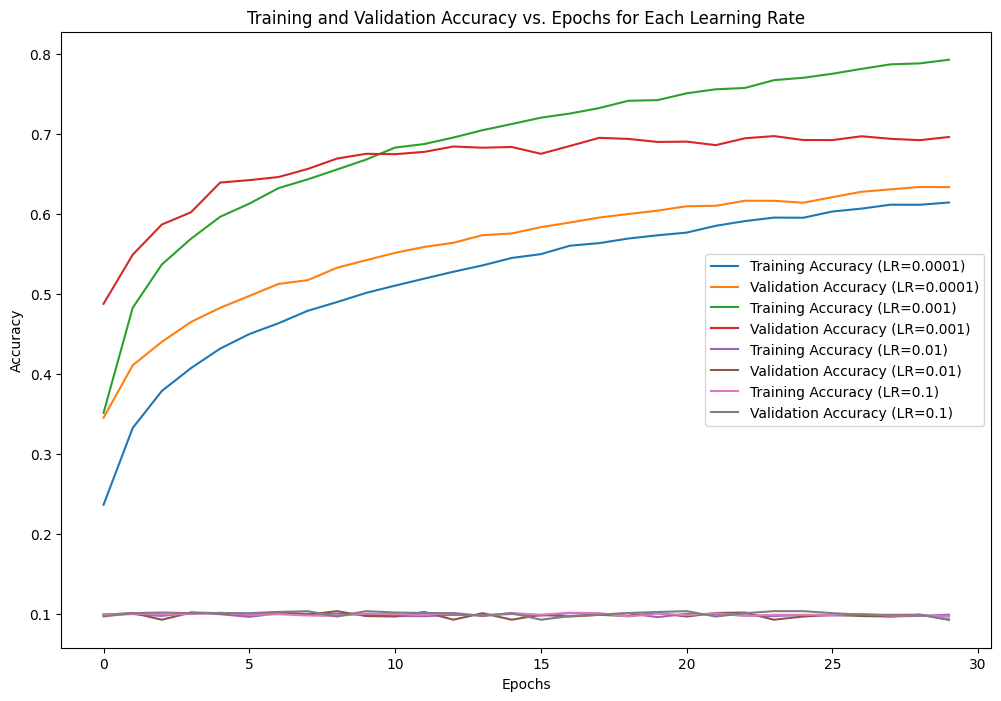

In [47]:
learning_rates=[0.0001,0.001,0.01,0.1]
learning_rates_new=[0.0001,0.001,0.01,0.1]
lr_labels = [f'LR={lr}' for lr in learning_rates]

# Creating a second plot for accuracy
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(history_per_lr[i].history['accuracy'], label=f'Training Accuracy ({lr_labels[i]})')
    plt.plot(history_per_lr[i].history['val_accuracy'], label=f'Validation Accuracy ({lr_labels[i]})')

plt.title('Training and Validation Accuracy vs. Epochs for Each Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

12. Choose two state-of-the-art pre-trained model or architecture like ImageNet, ResNet,
Googlenet, AlexNet, DenseNet and VGG.

Create the VGG model

In [48]:
def createVGGmodel():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


13. Load the pre-trained model and fine-tune it for the CIFAR-10 dataset.
14. Train the fine-tuned model using the same training and testing data splits as your
custom CNN model.
15. Record training and validation loss values for each epoch.

fit VGG model

In [49]:
vgg_model=createVGGmodel()
vgg_model=compilemodel(model, 0.0001)
vgg_model,vgg_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3083 - accuracy: 0.1017 - val_loss: 2.3105 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3074 - accuracy: 0.1017 - val_loss: 2.3095 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3067 - accuracy: 0.1017 - val_loss: 2.3086 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3061 - accuracy: 0.1017 - val_loss: 2.3079 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3055 - accuracy: 0.1017 - val_loss: 2.3073 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3051 - accuracy: 0.1017 - val_loss: 2.3067 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3047 - accuracy: 0.1017 - val_loss: 2.3062 - val_accuracy: 0.0933
Epoch 

Using Restnet

In [50]:
def createRestnetmodel():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model



Google net

In [51]:
def createGooglenetmodel():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


Fit for Restnet model

In [52]:
rest_model=createRestnetmodel()
rest_model=compilemodel(model, 0.0001)
rest_model,rest_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3036 - accuracy: 0.1017 - val_loss: 2.3048 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3034 - accuracy: 0.1017 - val_loss: 2.3046 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3033 - accuracy: 0.1017 - val_loss: 2.3044 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3032 - accuracy: 0.1017 - val_loss: 2.3042 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3031 - accuracy: 0.1017 - val_loss: 2.3040 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3030 - accuracy: 0.1017 - val_loss: 2.3039 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3029 - accuracy: 0.1017 - val_loss: 2.3037 - val_accuracy: 0.0933
Epoch 

Fit for Googlenet model

In [53]:
google_model=createGooglenetmodel()
google_model=compilemodel(model, 0.0001)
google_model,google_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3034 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3033 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3033 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3031 - val_accuracy: 0.0933
Epoch 

Calculate the test accuracy

For normal CNN models

In [54]:
y_test_one_hot= to_categorical(y_test, num_classes)
# Evaluate the model on the testing dataset

for i, lr in enumerate(learning_rates):
    model= normal_models[i]
    test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
    # Print the test accuracy
    print(f"Learning rate: {lr}")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 1.0578 - accuracy: 0.6327
Learning rate: 0.0001
Test Accuracy: 63.27%
313/313 [==============================] - 1s 3ms/step - loss: 1.0576 - accuracy: 0.6893
Learning rate: 0.001
Test Accuracy: 68.93%
313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000
Learning rate: 0.01
Test Accuracy: 10.00%
313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Learning rate: 0.1
Test Accuracy: 10.00%


VGG model

In [55]:
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"VGG model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
VGG model
Test Accuracy: 10.00%


Restnet model

In [56]:
test_loss, test_accuracy = rest_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"Rest model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
Rest model
Test Accuracy: 10.00%


Googlenet model

In [57]:
test_loss, test_accuracy = google_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"Googlenet model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Googlenet model
Test Accuracy: 10.00%
